<a href="https://colab.research.google.com/github/stefano-piotto/ppt_soglia/blob/main/similis_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving charge_ESTRADIOL_distance.csv to charge_ESTRADIOL_distance.csv
Saving charge_TAMOXIFEN_distance.csv to charge_TAMOXIFEN_distance.csv
Saving charge_LEVODOPA_distance.csv to charge_LEVODOPA_distance.csv
Saving charge_FLUOXETINE_distance.csv to charge_FLUOXETINE_distance.csv
Saving charge_Rotenone_distance.csv to charge_Rotenone_distance.csv
Saving charge_oxidopamine_distance.csv to charge_oxidopamine_distance.csv
Saving charge_donepezil_distance.csv to charge_donepezil_distance.csv
Saving charge_Bromodeoxyuridine_distance.csv to charge_Bromodeoxyuridine_distance.csv
Saving charge_KN62_distance.csv to charge_KN62_distance.csv
Saving charge_Coomassie_Brilliant_Blue_distance.csv to charge_Coomassie_Brilliant_Blue_distance.csv
Saving charge_BzATP_distance.csv to charge_BzATP_distance.csv
Saving charge_gamma-Aminobutyric_acid_distance.csv to charge_gamma-Aminobutyric_acid_distance.csv
Saving charge_sirolimus_distance.csv to charge_sirolimus_distance.csv
Saving charge_Papaverin_distance

In [ ]:
import zipfile
import os

# Replace 'your_folder.zip' with the name of the uploaded file
zip_file = 'zip_mol.zip'
destination = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination)

# Verify the files are extracted
os.listdir(destination)


['.config', 'zip_mol', 'zip_mol.zip', 'sample_data']

In [ ]:
# @title modules
import cv2
import glob
import io
import math
import pandas as pd
import numpy as np
from numpy import inf
from numpy import *
import math
from datetime import datetime
from itertools import combinations
from stat import S_IREAD
from stat import S_IWRITE
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import pairwise_distances
import time
import sys
import csv
import os
import imutils
from PIL import Image
from scipy.ndimage import rotate
from numpy.core.umath import isnan
np.set_printoptions(threshold=sys.maxsize)
from scipy.spatial.transform import Rotation as R
from scipy.optimize import minimize
import plotly.graph_objects as go
import difflib
import pandas as pd
from pyvis.network import Network
from IPython.display import display, clear_output
import ipywidgets as widgets
import json
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# @title All the important functions were defined here

def mulliken(qmtxt,qmcationtxt, macrotarget,qmfile):
    outputtxt=os.path.join(macrotarget,qmfile+'.txt')
    #catoutputtxt=os.path.join(macrotarget,qmfile+'_cation.txt')
    #anoutputtxt=os.path.join(macrotarget,qmfile+'_anion.txt')
    def chargeinfo(qmtxt):
        with open(qmtxt, 'r') as file:
            lines = file.readlines()

        start_index = None
        end_index = None

        for i, line in enumerate(lines):
            if "MULLIKEN ATOMIC CHARGES" in line or 'MULLIKEN ATOMIC CHARGES AND SPIN POPULATIONS' in line:
                start_index = i+2
            if "Sum of atomic charges:" in line or 'Sum of atomic charges         :' in line:
                end_index = i  # include the line with the sum in the output
                break

        if start_index is not None and end_index is not None:
            extracted_lines = lines[start_index:end_index]

            extracted_values = []
            for line in extracted_lines:
                parts = line.split(':')
                if len(parts) > 1:
                # Get the value after the colon, strip extra spaces
                    value = parts[1].strip()
                # Handle cases with multiple values
                    value_parts = value.split()
                    if value_parts:
                        # Append only the first element
                       extracted_values.append(value_parts[0])


            value= ','.join(extracted_values)
            values_list = value.split(',')
            return values_list
        else:
            return "The specified section was not found in the file."
            #for line in extracted_lines[1:]:
                #print(line)
                #charge_value = line.split(':')[1].strip()
                #chargevalue.append(charge_value)
            #return  chargevalue

    neutral_chargevalue=chargeinfo(qmtxt)
    #neutral_chargevalue=chargeinfo(qmtxt)
    cation_chargevalue=chargeinfo(qmcationtxt)
    #anion_chargevalue=chargeinfo(qmaniontxt)
    #print(neutral_chargevalue)
    ##print('break')
    #print(cation_chargevalue)
    #print('break')
    #print(anion_chargevalue)
    # Calculate the new list
    fukui = []
    for n in range(len(neutral_chargevalue)):
        #anion_charge = float(anion_chargevalue[n])
        cation_charge = float(cation_chargevalue[n])
        normal_charge= float(neutral_chargevalue[n])
        #print(type(anion_charge))
        #print(cation_charge)
        difference = round(((cation_charge - normal_charge)),3)
        #difference = float((anion_chargevalue[n] - cation_chargevalue[n]) / 2)
        fukui.append(difference)
#

        #for line in extracted_lines[1:]:
    counter = 1
    with open(outputtxt, "w") as inifout:
        for line in range(len(fukui)):
            charge_value = str(fukui[line])
            inifout.write(f"{counter} {charge_value}\n")
            counter += 1


def cartesion_to_polar(titolo,macrotarget,sys_type):
  #for titolo in (listamatrici):##-Matrix creation
    #titolo=str(titolo)
   print(titolo)
   readtxtfile= os.path.join(macrotarget,(sys_type)+'_'+(titolo)+'.txt')
   plan_c = pd.read_csv(readtxtfile,  delim_whitespace=True)
    #print((percorso)+(sys_type)+'_'+(titolo)+'.txt')
    #print(plan_c)
   philist=[]
   psilist=[]
   Iacol=[]
   for index, row in plan_c.iterrows():
        #print(row['x'], row['y'], row['z'])
       dist=(math.sqrt(row['x']**2+row['y']**2+row['z']**2))
       phi=(math.atan2((row['y']),(row['x'])))
       psi=(math.acos(row['z']/(dist)))
        #print(dist)
        #print((math.degrees(phi)))
        #print((math.degrees(psi)))
       philist.append(int((math.degrees(phi))))
       psilist.append(int((math.degrees(psi))))
       Iacol.append(row['bfac'])
        #print('--------')
   data_tuples = list(zip(Iacol,philist,psilist))
   df=pd.DataFrame(data_tuples, columns=['bfac','phi','psi'])
    #print(df)
   polarcordfile= os.path.join(macrotarget,(sys_type)+'_'+(titolo)+'.txt')
   df.to_csv(polarcordfile, index=False, sep="\t")
   return polarcordfile


def points_with_bfac_from_file(file_path):
    """Generates points on a sphere surface from phi and theta values stored in a file, and assigns bfac values."""
    try:
        data = np.genfromtxt(file_path, skip_header=1, usecols=(0, 1, 2))
    except IOError:
        print(f"Error: File {file_path} not found.")
        return None, None
    except ValueError:
        print("Error: Data format error in the file.")
        return None, None

    bfac_values = data[:, 0]
    phi = np.radians(data[:, 1])  # Convert degrees to radians
    theta = np.radians(data[:, 2])  # Convert degrees to radians
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    points = np.vstack((x, y, z)).T
    return points, bfac_values

def normalize_bfac(bfac_all):
    """Normalizes bfac values across all files using min and max values."""
    #bfac_min, bfac_max = np.min(bfac_all), np.max(bfac_all)
    #return (bfac_all - bfac_min) / ((bfac_max - bfac_min)+0.001)
    tanh_normalized = np.tanh(bfac_all)

    # Map the result from [-1, 1] to [0, 1]
    return (tanh_normalized + 1) / 2

def distance_metric(A, B, bfac_values_a, bfac_values_b, use_cosine=False, epsilon=0.001):
    """Calculates a weighted sum of the minimum distances between two sets of points, considering bfac values."""
    min_distances = []
    for i, a in enumerate(A):
        distances = np.linalg.norm(B - a, axis=1)
        if use_cosine:
            cos_distances = 1 - np.dot(B, a) / (np.linalg.norm(a) * np.linalg.norm(B, axis=1))
            distances = cos_distances
        weighted_distances = distances / (bfac_values_b + bfac_values_a[i] + epsilon)
        min_distance_index = np.argmin(weighted_distances)
        min_distances.append(weighted_distances[min_distance_index] * max(bfac_values_a[i], bfac_values_b[min_distance_index]))
    return np.sum(min_distances)
def objective(rotation_angles, A, B, bfac_values_a, bfac_values_b, use_cosine=False):
    """Funzione obiettivo che ruota B e calcola la distanza metrica tra A e B ruotato."""
    rotation = R.from_euler('xyz', rotation_angles)
    B_rotated = rotation.apply(B)
    distance = distance_metric(A, B_rotated, bfac_values_a, bfac_values_b, use_cosine)
    #distance_BA = distance_metric(B_rotated, A, bfac_values_b, bfac_values_a, use_cosine)
    return distance

def create_distance_matrix(folder1, folder2):
    files1 = [f for f in os.listdir(folder1) if f.endswith('.txt') and f.startswith('mol_')]
    files2 = [f for f in os.listdir(folder2) if f.endswith('.txt') and f.startswith('mol_')]
    bfac_all = []

    # Load all bfac values to normalize later
    for file_list in (files1, files2):
        for file in file_list:
            _, bfac_values = points_with_bfac_from_file(os.path.join(folder1, file))
            if bfac_values is not None:
                bfac_all.extend(bfac_values)

    # Normalize bfac values
    bfac_all = normalize_bfac(np.array(bfac_all))
    distance_list_ab = []
    distance_list_ba = []
    num_files1 = len(files1)
    num_files2 = len(files2)
    distance_matrix = np.zeros((num_files1, num_files2))
    for i, file1 in enumerate(files1):
        A, bfac_values_a = points_with_bfac_from_file(os.path.join(folder1, file1))
        bfac_values_a = normalize_bfac(bfac_values_a)
        for j, file2 in enumerate(files2):
            B, bfac_values_b = points_with_bfac_from_file(os.path.join(folder2, file2))
            bfac_values_b = normalize_bfac(bfac_values_b)
            result_ab = minimize(objective, x0=np.array([0, 0, 0]), args=(A, B, bfac_values_a, bfac_values_b, False), method='Powell')
            distance_list_ab.append(result_ab.fun)
            #print(result_ab)
            result_ba = minimize(objective, x0=np.array([0, 0, 0]), args=(B, A, bfac_values_b, bfac_values_a, False), method='Powell')
            #print(result_ba.fun)
            average_distance = np.round((result_ab.fun + result_ba.fun) / 2, 3)
            distance_list_ba.append(result_ba.fun)
            intermolecular_distance= np.round((result_ab.fun + result_ba.fun) / 2, 3)
            sigmoid_distance =(np.exp(intermolecular_distance) - 1) / (np.exp(intermolecular_distance) + 8)#2 / (1 + np.exp(-intermolecular_distance))-1
            distance_matrix[i, j] = sigmoid_distance#np.round((result_ab.fun + result_ba.fun) / 2, 3)  # Average and round

    return distance_matrix, files1, files2


def clusters_name(filenames):
    clusters_name_set = set()
    for filename in filenames:
        filename_list = filename.split("_")
        del filename_list[-1]
        cluster_name = "_".join(filename_list)
        clusters_name_set.add(cluster_name)
    return clusters_name_set

def define_clusters_file(path, filenames):
    clusters_name_set = clusters_name(filenames)
    for cluster_name in clusters_name_set:
        path_cluster_name = os.path.join(path, cluster_name+'_cluster.txt')
        with open(path_cluster_name, "w") as f:
            filename_list_to_order = list()
            for filename in filenames:
                filename_list = filename.split("_")
                del filename_list[-1]
                filename_cleaned = "_".join(filename_list)
                if cluster_name == filename_cleaned:
                    filename_list_to_order.append(filename)
            filename_list_to_order.sort()
            for filename in filename_list_to_order:
                f.write(filename+"\n")


def specific_distance_matrix(specific_file, folder1, folder2,output_csv):
    # Check if the specific file exists in folder1
    # Check if the specific file exists in folder1
    if not os.path.exists(os.path.join(folder1, specific_file)):
        raise FileNotFoundError(f"The specified file {specific_file} does not exist in {folder1}.")

    # Filter files in folder2 that start with 'mol_' and end with '.txt'
    files2 = [f for f in os.listdir(folder2) if f.endswith('.txt') and f.startswith('mol_')]

    # Load all bfac values to normalize later
    bfac_all = []
    _, bfac_values_specific = points_with_bfac_from_file(os.path.join(folder1, specific_file))
    if bfac_values_specific is not None:
        bfac_all.extend(bfac_values_specific)

    for file in files2:
        _, bfac_values = points_with_bfac_from_file(os.path.join(folder2, file))
        if bfac_values is not None:
            bfac_all.extend(bfac_values)

    # Normalize bfac values
    bfac_all = normalize_bfac(np.array(bfac_all))

    # Prepare the distance matrix
    num_files2 = len(files2)
    distance_matrix = np.zeros((1, num_files2))

    # Load specific file's data
    A, bfac_values_a = points_with_bfac_from_file(os.path.join(folder1, specific_file))
    bfac_values_a = normalize_bfac(bfac_values_a)

    # Calculate distances between specific file and all files in folder2
    for j, file2 in enumerate(files2):
        B, bfac_values_b = points_with_bfac_from_file(os.path.join(folder2, file2))
        bfac_values_b = normalize_bfac(bfac_values_b)
        result_ab = minimize(objective, x0=np.array([0, 0, 0]), args=(A, B, bfac_values_a, bfac_values_b, False), method='Powell')
        result_ba = minimize(objective, x0=np.array([0, 0, 0]), args=(B, A, bfac_values_b, bfac_values_a, False), method='Powell')
        distance_matrix[0, j] = ((result_ab.fun + result_ba.fun) / 2)  # Average and round

    # Write the results to a CSV file
    #with open(output_csv, 'w') as f:
        # Write header
        #f.write(f"{specific_file.split('.')[0]},")  # Write the name of the specific file without its extension
        #f.write(",".join(files2[i].split('.')[0] for i in range(len(files2))) + "\n")

        # Write distances for the specific file
        #f.write(specific_file.split('.')[0] + ",")  # Write the name of the specific file without its extension
        #f.write(",".join(f"{x:.3f}" for x in distance_matrix[0]) + "\n")
    with open(output_csv, 'w') as f:
        # Write header
        f.write("specific_file, other_file, distance\n")

        # Write distances column-wise
        specific_name = specific_file.split('.')[0].split('mol_')[1]

        for i in range(len(files2)):
            # Get the file name from files2 and the distance
            other_file_name = files2[i].split('.')[0].split('mol_')[1]
            distance = distance_matrix[0][i]  # Assuming distance_matrix[0] is the row with distances
            sigmoid_distance = 1-((np.exp(distance) - 1) / (np.exp(distance) + 8))
            # Write in the format: specific_file, other_file, distance
            f.write(f"{specific_name},{other_file_name},{sigmoid_distance}\n")
    print(f"Distance matrix saved to {output_csv}")


def readfile(qmxyz):
    f= open(qmxyz,'r')
    data=f.readlines()
    data=''.join(data[2:])
    return data

def xyz_fromsmile(macrotarget, yasara,smilelistfile):
    datacontent= '''
ForceField AMBER03,SetPar=No
Interactions Bond,Angle,Dihedral,Planarity,Coulomb,VdW
conta=1
for line in file (smile_file)
  clear
  DelObj all
  console off
  MakeTab MyTable,Dimensions=1
  smiles,name=split line
  BuildSMILES String=(smiles)
  clean
  TempCtrl SteepDes
  Sim On
  wait 300,femtoseconds
  Sim Off
  SaveXYZ 1, (macrotarget)/(name).xyz,transform=Yes
  charge= ChargeObj 1
  charge= (charge+00)
  Tabulate (charge)
  SaveTab MyTable,(macrotarget)\(name).txt,Format=Text,Columns=1,NumFormat=6.0f,charge
  DelTab all
exit
'''
    xyzmacro= open((os.path.join(macrotarget,'xyz_macro.mcr')),'w+')
    xyzmacro.write("macrotarget= '"+macrotarget+"'\n")
    xyzmacro.write("smile_file= '"+smilelistfile+"'\n")
    xyzmacro.write(datacontent)
    xyzmacro.close()
    xyzmacrofile= os.path.join(macrotarget,'xyz_macro.mcr')
    os.system(yasara+' '+xyzmacrofile)
    xyz_files_glob = glob.glob(os.path.join(macrotarget, '*.xyz'))
    for xyz in xyz_files_glob:
        filename = os.path.basename(xyz)  # Get the file name with extension
        name_without_extension = os.path.splitext(filename)[0]  # Remove the extension
        qminp= os.path.join(macrotarget,name_without_extension+'.inp')
        qmout= os.path.join(macrotarget,name_without_extension+'.out')
        qmxyz= os.path.join(macrotarget,name_without_extension+'.xyz')
        qm_cationinp= os.path.join(macrotarget,name_without_extension+'_cation.inp')
        qm_cationout= os.path.join(macrotarget,name_without_extension+'_cation.out')
        qm_cationxyz= os.path.join(macrotarget,name_without_extension+'_cation.xyz')
       # qm_anioninp= os.path.join(macrotarget,name_without_extension+'_anion.inp')
        #qm_anionout= os.path.join(macrotarget,name_without_extension+'_anion.out')
        #qm_anionxyz= os.path.join(macrotarget,name_without_extension+'_anion.xyz')
        if os.path.isfile(qmout):
            print("done")
        else:
            print(name_without_extension)
            qmcharge=os.path.join(macrotarget,name_without_extension+'.txt')
            k=open(qmcharge,'r')
            datafile= k.readlines()
            charge_info= int(datafile[1])
            cationcharge=(charge_info+1)
            #anioncharge=(charge_info-1)
            #if charge_info == str(-0.00):
              #charge_info= 0
            data= readfile(qmxyz)
           #print(data)
            orcainp= open(qminp,'w+')
            orcainp.write('!PM3 RHF OPT')
            orcainp.write('\n\n* xyz  '+str(charge_info)+' 1 \n')
            orcainp.write(data+'*\n')
            orcainp.close()
            #os.chdir(yasarapath)
           #os.chdir(macrotarget)
           #time.sleep(5)
            print('QM fukui function optimization is in process for '+(name_without_extension))
            os.system(orca+' '+qminp+' > '+qmout)
            qm_opt_data= readfile(qmxyz)
            #mulliken(qmout, macrotarget,name_without_extension)
            #cation_opt
            orcainp= open(qm_cationinp,'w+')
            orcainp.write('!PM3 RHF OPT')
            orcainp.write('\n\n* xyz  '+str(cationcharge)+' 2 \n')
            orcainp.write(qm_opt_data+'*\n')
            orcainp.close()
            print('QM fukui function optimization is in process for cation of '+(name_without_extension))
            os.system(orca+' '+qm_cationinp+' > '+qm_cationout)
            #anion_opt
           # orcainp= open(qm_anioninp,'w+')
           # orcainp.write('!PBE DEF2SVP OPT')
           # orcainp.write('\n\n* xyz  '+str(anioncharge)+' 2 \n')
            #orcainp.write(qm_opt_data+'*\n')
            #orcainp.close()
            #print('QM fukui function optimization is in process for anion of '+(name_without_extension))
            #os.system(orca+' '+qm_anioninp+' > '+qm_anionout)
            mulliken(qmout,qm_cationout, macrotarget,name_without_extension)
            os.remove(os.path.join(macrotarget,name_without_extension+'_cation_trj.xyz'))
            os.remove(os.path.join(macrotarget,name_without_extension+'_cation.xyz'))
            os.remove(os.path.join(macrotarget,name_without_extension+'_trj.xyz'))



def normalize(path,file1):
    file1=os.path.join(path,file1)
    #file2=os.path.join(path,file2)
    base_name1 = os.path.splitext(os.path.basename(file1))[0]
    #base_name2 = os.path.splitext(os.path.basename(file2))[0]
    distance_matrix1 = pd.read_csv(file1, sep=',', index_col=0)
    #distance_matrix2 = pd.read_csv(file2, sep=';', index_col=0)

# Apply min-max normalization to the distance matrix
    normalized_matrix1 = (distance_matrix1 - distance_matrix1.min().min()) / (distance_matrix1.max().max() - distance_matrix1.min().min())
    #normalized_matrix2 = (distance_matrix2 - distance_matrix2.min().min()) / (distance_matrix2.max().max() - distance_matrix2.min().min())

# Save the normalized matrix to a new CSV file
    norm_file1= os.path.join(path,'norm_'+base_name1+'.csv')
    #norm_file2= os.path.join(path,'norm_'+base_name2+'.csv')
    normalized_matrix1.to_csv(norm_file1, sep=',')
    #normalized_matrix2.to_csv(norm_file2, sep=';')
    return norm_file1#,norm_file2



def generate_interactive_graph(path,file_path):
    df = pd.read_csv(file_path, sep=',', index_col=0)
    labels = [label.replace('mol_', '') for label in df.columns.tolist()]

    clear_output(wait=True)
    print("Generating interactive graph...")
    soglia_similarita = 1

    G_pyvis = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="black", cdn_resources='remote')

    nodes_to_add = set()
    edges_to_add = []

    # Add edges based on the threshold
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if df.iloc[i, j] < soglia_similarita:  # Using '<' for distance threshold
                nodes_to_add.add(labels[i])
                nodes_to_add.add(labels[j])
                edges_to_add.append((labels[i], labels[j], (1 - (df.iloc[i, j]))))

    # Add nodes to the PyVis graph
    for node in nodes_to_add:
        G_pyvis.add_node(node, label=node, color='red', title=f"Data for node {node}")

    # Add edges to the PyVis graph
    for edge in edges_to_add:
        G_pyvis.add_edge(edge[0], edge[1], title=f"Similarity: {edge[2]:.3f}")

    # Set visualization options
    options = json.dumps({
        "nodes": {
            "size": 10,
            "font": {
                "size": 18  # Default font size for labels
            }
        },
        "physics": {
            "forceAtlas2Based": {
                "springLength": 100
            },
            "minVelocity": 0.75,
            "solver": "forceAtlas2Based"
        },
        "interaction": {
            "tooltipDelay": 200,
            "hideEdgesOnDrag": False,
            "multiselect": True
        }
    })
    G_pyvis.set_options(options)

    # Save the graph with embedded JavaScript controls for filtering
    html_path = os.path.join(path, "similarity_network.html")
    G_pyvis.show(html_path)
    G_pyvis.save_graph(html_path)

    # Add JavaScript for node, label size, and edge filtering
    with open(html_path, 'a') as f:
        f.write('''
        <script>
            // Function to update node size dynamically
            function updateNodeSize(scale) {
                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(function(node) {
                        return {id: node.id, size: scale};
                    })
                );
            }

            // Function to update label size dynamically
            function updateLabelSize(scale) {
                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(function(node) {
                        return {id: node.id, font: {size: scale}};
                    })
                );
            }

            // Function to filter nodes by name and connected edges based on similarity threshold
            function filterGraph(name, similarityThreshold) {
                let matchingNodes = new Set();
                let connectedNodes = new Set();

                // Filter nodes by name
                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(function(node) {
                        if (node.label.toLowerCase().includes(name.toLowerCase())) {
                            matchingNodes.add(node.id);
                            return {id: node.id, hidden: false};
                        } else {
                            return {id: node.id, hidden: true};
                        }
                    })
                );

                // Filter edges based on similarity threshold and reveal connected nodes
                network.body.data.edges.update(
                    network.body.data.edges.get().map(function(edge) {
                        let similarity = parseFloat(edge.title.split(": ")[1]);
                        if ((matchingNodes.has(edge.from) || matchingNodes.has(edge.to)) && similarity >= similarityThreshold) {
                            connectedNodes.add(edge.from);
                            connectedNodes.add(edge.to);
                            return {id: edge.id, hidden: false};
                        } else {
                            return {id: edge.id, hidden: true};
                        }
                    })
                );

                // Reveal the nodes connected by visible edges
                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(function(node) {
                        if (connectedNodes.has(node.id)) {
                            return {id: node.id, hidden: false};
                        }
                    })
                );
            }

            // Initialize event listeners for node size, label size, similarity, and name filters
            document.addEventListener("DOMContentLoaded", function() {
                let nodeSizeSlider = document.getElementById("scaleRange");
                nodeSizeSlider.oninput = function() {
                    updateNodeSize(this.value);
                };

                let labelSizeSlider = document.getElementById("labelSizeRange");
                labelSizeSlider.oninput = function() {
                    updateLabelSize(this.value);
                };

                let nameInput = document.getElementById("nameFilter");
                let similaritySlider = document.getElementById("distanceRange");
                let similarityValueDisplay = document.getElementById("similarityValue");

                // Call filterGraph when the name input or similarity threshold changes
                nameInput.oninput = function() {
                    filterGraph(this.value, parseFloat(similaritySlider.value));
                };
                similaritySlider.oninput = function() {
                    // Update the similarity value display
                    similarityValueDisplay.innerHTML = this.value;
                    filterGraph(nameInput.value, parseFloat(this.value));
                };
            });
        </script>
        <div>
            <label for="scaleRange">Node Size: </label>
            <input type="range" id="scaleRange" name="scaleRange" min="1" max="50" value="10" oninput="updateNodeSize(this.value)">
        </div>
        <div>
            <label for="labelSizeRange">Label Size: </label>
            <input type="range" id="labelSizeRange" name="labelSizeRange" min="10" max="50" value="18" oninput="updateLabelSize(this.value)">
        </div>
        <div>
            <label for="distanceRange">Similarity Threshold: </label>
            <input type="range" id="distanceRange" name="distanceRange" min="0" max="1" step="0.01" value="1" oninput="filterGraph(document.getElementById('nameFilter').value, parseFloat(this.value))">
            <span id="similarityValue">1.00</span> <!-- Display the current similarity value -->
        </div>
        <div>
            <label for="nameFilter">Filter Nodes by Name: </label>
            <input type="text" id="nameFilter" name="nameFilter" placeholder="Enter node name..." oninput="filterGraph(this.value, parseFloat(document.getElementById('distanceRange').value))">
        </div>
        ''')


    try:
        import google.colab
        from google.colab import files
        files.download('similarity_network.html')  # Auto-download in Google Colab
    except ImportError:
        print("Interactive graph ready. Please click on the file in Jupyter to download.")

In [ ]:
macrotarget='/content/zip_mol'
specific_file= 'mol_shikonin.txt'
folder1=macrotarget
folder2=macrotarget
#output_csv = os.path.join(macrotarget, "charge_shikonin_distance_matrixnew.csv")
#specific_distance_matrix(specific_file, folder1, folder2,output_csv)

molecules_of_interest = ['DIZOCILPINE', 'L685458', 'isoxazolepropionic_acid', 'N-Methylaspartate', 'Papaverin',
                         'sirolimus', 'gamma-Aminobutyric_acid', 'BzATP', 'Coomassie_Brilliant_Blue', 'KN62',
                         'Bromodeoxyuridine', 'donepezil', 'oxidopamine', 'Rotenone', 'FLUOXETINE', 'LEVODOPA',
                         'TAMOXIFEN', 'ESTRADIOL']

for molecule in molecules_of_interest:
  specific_file= f"mol_{molecule}.txt"
  folder1=macrotarget
  folder2=macrotarget
  output_csv = os.path.join(macrotarget, f"charge_{molecule}_distance.csv")
  print(output_csv)
  specific_distance_matrix(specific_file, folder1, folder2,output_csv)

/content/zip_mol/charge_DIZOCILPINE_distance.csv
Distance matrix saved to /content/zip_mol/charge_DIZOCILPINE_distance.csv
/content/zip_mol/charge_L685458_distance.csv
Distance matrix saved to /content/zip_mol/charge_L685458_distance.csv
/content/zip_mol/charge_isoxazolepropionic_acid_distance.csv
Distance matrix saved to /content/zip_mol/charge_isoxazolepropionic_acid_distance.csv
/content/zip_mol/charge_N-Methylaspartate_distance.csv
Distance matrix saved to /content/zip_mol/charge_N-Methylaspartate_distance.csv
/content/zip_mol/charge_Papaverin_distance.csv
Distance matrix saved to /content/zip_mol/charge_Papaverin_distance.csv
/content/zip_mol/charge_sirolimus_distance.csv
Distance matrix saved to /content/zip_mol/charge_sirolimus_distance.csv
/content/zip_mol/charge_gamma-Aminobutyric_acid_distance.csv
Distance matrix saved to /content/zip_mol/charge_gamma-Aminobutyric_acid_distance.csv
/content/zip_mol/charge_BzATP_distance.csv
Distance matrix saved to /content/zip_mol/charge_BzA

In [ ]:
import pandas as pd
import glob

# List of molecules of interest
molecules_of_interest = [
    'DIZOCILPINE', 'L685458', 'isoxazolepropionic_acid', 'N-Methylaspartate', 'Papaverin',
    'sirolimus', 'gamma-Aminobutyric_acid', 'BzATP', 'Coomassie_Brilliant_Blue', 'KN62',
    'Bromodeoxyuridine', 'donepezil', 'oxidopamine', 'Rotenone', 'FLUOXETINE', 'LEVODOPA',
    'TAMOXIFEN', 'ESTRADIOL'
]

# Get all CSV files in the directory
csv_files = glob.glob("*.csv")  # Adjust the path if needed

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Process each CSV file and combine data
for file in csv_files:
    df = pd.read_csv(file, sep=",")  # Assuming tab-separated, change if needed
    all_data = pd.concat([all_data, df], ignore_index=True)

# Filter only rows where 'specific_file' is in molecules_of_interest
filtered_data = all_data[all_data['specific_file'].isin(molecules_of_interest)]

# Exclude rows where 'specific_file' and 'other_file' are the same
filtered_data = filtered_data[filtered_data['specific_file'] != filtered_data[' other_file']]

# Find the minimum distance 'other_file' for each molecule
min_distance_results = filtered_data.loc[filtered_data.groupby('specific_file')[' distance'].idxmax()]
min_distance_results[' distance'] = min_distance_results[' distance'].astype(float).map('{:.3f}'.format)
# Save results

# Display results
print(min_distance_results)


                  specific_file    other_file  distance
13306         Bromodeoxyuridine     PARGYLINE     0.542
23787                     BzATP     SPARTEINE     0.142
267    Coomassie_Brilliant_Blue      AXITINIB     0.379
6229                DIZOCILPINE     ANTHRALIN     0.735
9354                  ESTRADIOL       CAMPHOR     0.506
2811                 FLUOXETINE   ATOMOXETINE     0.716
19781                      KN62   LAROPIPRANT     0.156
11211                   L685458     CYCRIMINE     0.117
17624                  LEVODOPA    METHYLDOPA     0.942
3267          N-Methylaspartate    METHIONINE     0.784
12059                 Papaverin    SELEGILINE     0.684
24479                  Rotenone   IDOXURIDINE     0.558
15153                 TAMOXIFEN  BUTRIPTYLINE     0.569
16727                 donepezil   ROFLUMILAST     0.500
20165   gamma-Aminobutyric_acid   ENBUCRILATE     0.934
22250   isoxazolepropionic_acid  AMINOBENZOIC     0.793
5314                oxidopamine    FOMEPIZOLE   

<ipython-input-32-ff6665b7ee70>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[' distance'] = plot_data[' distance'].astype(float)
<ipython-input-32-ff6665b7ee70>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis') # You can choose other colormaps like 'plasma', 'inferno', etc.
<ipython-input-32-ff6665b7ee70>:34: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(data=plot_data, x='specific_file', y=' distance', hue='other_file'

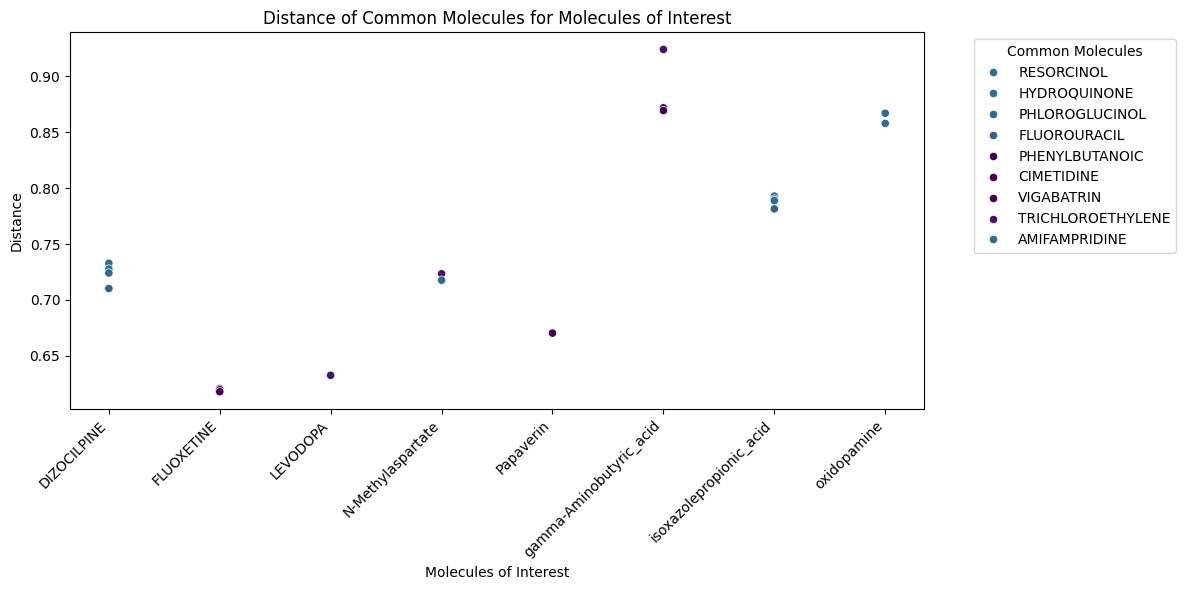

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Exclude rows where 'specific_file' and 'other_file' are the same
filtered_data = filtered_data[filtered_data['specific_file'] != filtered_data[' other_file']]
filtered_data = filtered_data[filtered_data[' distance'] > 0.6]
top_10_molecules = filtered_data.sort_values(['specific_file', ' distance'], ascending=[True, False]) \
                                .groupby('specific_file').head(10)

# Remove extra space in column name if present
top_10_molecules = top_10_molecules.rename(columns={' other_file': 'other_file'})

# Find common molecules among the top 10
common_molecules = top_10_molecules.groupby('other_file')['specific_file'].nunique().reset_index()
common_molecules = common_molecules[common_molecules['specific_file'] > 1]['other_file'].tolist()

# Filter data for common molecules and molecules of interest
plot_data = top_10_molecules[
    top_10_molecules['other_file'].isin(common_molecules) &
    top_10_molecules['specific_file'].isin(molecules_of_interest)
]

# Convert ' distance' column to float
plot_data[' distance'] = plot_data[' distance'].astype(float)
plt.figure(figsize=(12, 6))
# Plotting using Seaborn
cmap = cm.get_cmap('viridis') # You can choose other colormaps like 'plasma', 'inferno', etc.
norm = plt.Normalize(plot_data[' distance'].min(), plot_data[' distance'].max())
colors = cmap(norm(plot_data[' distance']))

sns.scatterplot(data=plot_data, x='specific_file', y=' distance', hue='other_file', palette=colors)
plt.title('Distance of Common Molecules for Molecules of Interest')
plt.xlabel('Molecules of Interest')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Common Molecules', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distance_scatter_plot.png') # You can change the filename and extension
plt.show()